In [1]:
import numpy as np
import matplotlib.pyplot as plt
from env.dynaQ_maze import DynaQMaze
from dyna_q import DynaQ

## Tabular Dyna-Q Plus

In [2]:
start_location = (5, 3)
target_location = (0, 8)
rows = 6
columns = 9
block_positions = [[3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7], [3, 8]]
first_env = DynaQMaze(rows=rows, 
                columns=columns, 
                block_positions=block_positions, 
                start_location=start_location, 
                target_location=target_location)

num_actions = first_env.action_space.n

In [3]:
block_positions = [[3, 1], [3, 2], [3, 3], [3, 4], [3, 5], [3, 6], [3, 7]]
second_env = DynaQMaze(rows=rows, 
                       columns=columns, 
                       block_positions=block_positions, 
                       start_location=start_location, 
                       target_location=target_location)

In [19]:
gamma = 0.95
epsilon = 0.1
alpha = 0.1
total_steps = 6000
planning_steps = 50
runs = 5

mean_cum_rewards_dynaQ = np.zeros((total_steps,), dtype=np.float32)

for run in range(runs):
    env = first_env
    
    dyna = DynaQ(
        num_actions=num_actions,
        add_bonus=False, 
        planning_steps=planning_steps,
        gamma=gamma, 
        alpha=alpha,
        epsilon=epsilon,
    )
    state = env.reset()
    for step in range(total_steps):
        if step == 3000:
            env = second_env
            env.reset()
            env.observation['agent'] = first_env.observation['agent']
            state = env.observation['agent']
        state, reward, terminated = dyna.step(state, env)
        if terminated:
            state = env.reset()

    mean_cum_rewards_dynaQ += np.array(dyna.cumulative_rewards_per_step[1:])
    print(f"\rRun: {run + 1:<3}", end='')
print()
mean_cum_rewards_dynaQ /= runs

Run: 5  


In [20]:
gamma = 0.95
epsilon = 0.1
alpha = 0.1
total_steps = 6000
planning_steps = 50
runs = 5
kappa = 1e-5

mean_cum_rewards_dynaQ_plus = np.zeros((total_steps,), dtype=np.float32)
for run in range(runs):
    env = first_env
    
    dyna = DynaQ(
        num_actions=num_actions,
        add_bonus=True, 
        planning_steps=planning_steps,
        gamma=gamma, 
        alpha=alpha,
        epsilon=epsilon,
        kappa=kappa
    )
    state = env.reset()
    for step in range(total_steps):
        if step == 3000:
            env = second_env
            env.reset()
            env.observation['agent'] = first_env.observation['agent']
            state = env.observation['agent']
        state, reward, terminated = dyna.step(state, env)
        if terminated:
            state = env.reset()
    mean_cum_rewards_dynaQ_plus += np.array(dyna.cumulative_rewards_per_step[1:])
    print(f"\rRun: {run + 1:<3}", end='')
print()
mean_cum_rewards_dynaQ_plus /= runs

Run: 5  


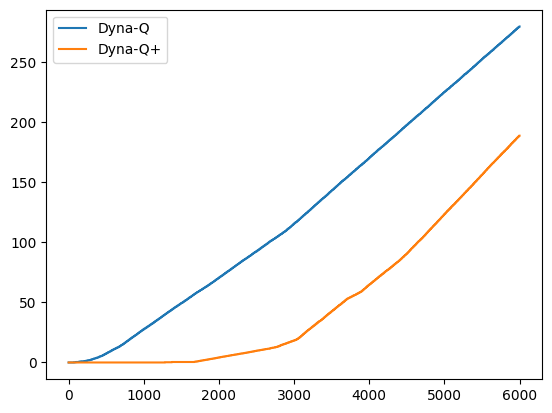

In [21]:
fig = plt.figure()
ax = plt.subplot(111)
ax.plot(mean_cum_rewards_dynaQ, label='Dyna-Q')
ax.plot(mean_cum_rewards_dynaQ_plus, label='Dyna-Q+')
plt.legend()

*I dont't know why, but I couldn't get Dyna-Q+ to outperform Dyna-Q*